In [8]:
# !pip install seaborn

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# 1. Load the data
df = pd.read_csv("aqi_data_for_eda.csv")
df

,date,temperature,relative_humidity,rain,wind_speed,wind_direction,surface_pressure,cloud_cover,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,hour,day_of_week,month,pm2_5_lag_1,pm2_5_lag_24
0,2025-09-18 00:00:00+00:00,25.70,96.496190,0.0,8.709098,288.060550,1004.59580,98.0,44.0,18.5,169.0,12.3,9.5,34.0,75.478720,0,3,9,20.7,16.8
1,2025-09-18 01:00:00+00:00,26.20,94.241260,0.0,7.204498,282.994630,1004.99680,25.0,42.5,18.2,252.0,14.0,10.7,33.0,75.629440,1,3,9,18.5,17.1
2,2025-09-18 02:00:00+00:00,26.20,94.522150,0.0,7.056827,275.855930,1005.39655,61.0,45.2,21.0,370.0,16.3,12.3,32.0,75.726950,2,3,9,18.2,19.4
3,2025-09-18 03:00:00+00:00,26.85,90.698500,0.1,8.467655,267.563420,1005.79800,66.0,58.7,21.8,436.0,16.8,14.0,36.0,75.868800,3,3,9,21.0,19.7
4,2025-09-18 04:00:00+00:00,28.00,82.793530,0.1,10.656547,254.320400,1006.20090,80.0,77.8,22.9,392.0,14.0,15.8,48.0,76.054970,4,3,9,21.8,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2026-01-15 19:00:00+00:00,18.55,85.657260,0.0,4.532284,6.842679,1014.66766,0.0,65.2,58.0,3653.0,75.4,32.3,5.0,97.544330,19,3,1,54.4,30.2
2876,2026-01-15 20:00:00+00:00,18.10,87.269220,0.0,2.902413,7.124930,1014.46660,2.0,65.7,58.6,3451.0,74.8,30.5,5.0,100.010420,20,3,1,58.0,28.1
2877,2026-01-15 21:00:00+00:00,17.70,88.639480,0.0,2.448265,17.102825,1014.66550,20.0,63.3,56.6,3153.0,73.5,28.2,6.0,103.187500,21,3,1,58.6,26.1
2878,2026-01-15 22:00:00+00:00,17.30,90.037224,0.0,2.995797,32.735230,1014.26460,34.0,58.4,51.5,2702.0,71.6,25.5,9.0,106.364586,22,3,1,56.6,26.4


In [13]:
# types of features
df.dtypes

date                  object
temperature          float64
relative_humidity    float64
rain                 float64
wind_speed           float64
wind_direction       float64
surface_pressure     float64
cloud_cover          float64
pm10                 float64
pm2_5                float64
carbon_monoxide      float64
nitrogen_dioxide     float64
sulphur_dioxide      float64
ozone                float64
us_aqi               float64
hour                   int64
day_of_week            int64
month                  int64
pm2_5_lag_1          float64
pm2_5_lag_24         float64
dtype: object

In [16]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [17]:
df

,temperature,relative_humidity,rain,wind_speed,wind_direction,surface_pressure,cloud_cover,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,hour,day_of_week,month,pm2_5_lag_1,pm2_5_lag_24
date,,,,,,,,,,,,,,,,,,,
2025-09-18 00:00:00+00:00,25.70,96.496190,0.0,8.709098,288.060550,1004.59580,98.0,44.0,18.5,169.0,12.3,9.5,34.0,75.478720,0,3,9,20.7,16.8
2025-09-18 01:00:00+00:00,26.20,94.241260,0.0,7.204498,282.994630,1004.99680,25.0,42.5,18.2,252.0,14.0,10.7,33.0,75.629440,1,3,9,18.5,17.1
2025-09-18 02:00:00+00:00,26.20,94.522150,0.0,7.056827,275.855930,1005.39655,61.0,45.2,21.0,370.0,16.3,12.3,32.0,75.726950,2,3,9,18.2,19.4
2025-09-18 03:00:00+00:00,26.85,90.698500,0.1,8.467655,267.563420,1005.79800,66.0,58.7,21.8,436.0,16.8,14.0,36.0,75.868800,3,3,9,21.0,19.7
2025-09-18 04:00:00+00:00,28.00,82.793530,0.1,10.656547,254.320400,1006.20090,80.0,77.8,22.9,392.0,14.0,15.8,48.0,76.054970,4,3,9,21.8,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-15 19:00:00+00:00,18.55,85.657260,0.0,4.532284,6.842679,1014.66766,0.0,65.2,58.0,3653.0,75.4,32.3,5.0,97.544330,19,3,1,54.4,30.2
2026-01-15 20:00:00+00:00,18.10,87.269220,0.0,2.902413,7.124930,1014.46660,2.0,65.7,58.6,3451.0,74.8,30.5,5.0,100.010420,20,3,1,58.0,28.1
2026-01-15 21:00:00+00:00,17.70,88.639480,0.0,2.448265,17.102825,1014.66550,20.0,63.3,56.6,3153.0,73.5,28.2,6.0,103.187500,21,3,1,58.6,26.1


In [18]:
corr = df.corr()

In [19]:
corr

,temperature,relative_humidity,rain,wind_speed,wind_direction,surface_pressure,cloud_cover,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,hour,day_of_week,month,pm2_5_lag_1,pm2_5_lag_24
temperature,1.000000,-0.299342,0.058499,0.294161,0.292875,-0.665614,0.139009,0.003639,-0.365510,-0.332583,-0.386696,-0.013601,0.513784,-0.248153,-5.876831e-02,-8.003234e-03,2.487108e-01,-0.356650,-0.364806
relative_humidity,-0.299342,1.000000,0.092872,-0.087367,0.319377,-0.280318,0.222682,0.189429,0.031911,-0.001034,0.228448,-0.282991,-0.655513,-0.135783,1.353553e-01,4.947760e-02,-6.477445e-02,0.016825,0.073337
rain,0.058499,0.092872,1.000000,0.107823,-0.006969,-0.126872,0.162277,-0.042897,-0.097495,-0.059413,-0.070889,-0.083126,0.002992,-0.107422,1.721075e-02,-6.865741e-04,4.020553e-03,-0.095303,-0.093057
wind_speed,0.294161,-0.087367,0.107823,1.000000,-0.064538,-0.372608,0.173015,-0.033772,-0.286614,-0.481571,-0.396264,-0.407317,0.176797,-0.298253,3.666100e-02,-9.147461e-02,3.674946e-03,-0.301327,-0.250646
wind_direction,0.292875,0.319377,-0.006969,-0.064538,1.000000,-0.318570,0.036018,0.150039,-0.095134,-0.087291,0.092385,0.092460,-0.043330,-0.054806,1.322966e-01,5.274215e-02,1.290182e-01,-0.127169,-0.006645
surface_pressure,-0.665614,-0.280318,-0.126872,-0.372608,-0.318570,1.000000,-0.331352,-0.051189,0.341549,0.385577,0.233225,0.383342,0.033212,0.390896,-5.993645e-02,3.701225e-02,-2.280430e-01,0.356783,0.328589
cloud_cover,0.139009,0.222682,0.162277,0.173015,0.036018,-0.331352,1.000000,-0.007031,-0.169509,-0.153400,-0.119269,-0.112694,-0.080007,-0.256824,-2.973107e-02,8.422234e-02,1.058643e-01,-0.165304,-0.227611
pm10,0.003639,0.189429,-0.042897,-0.033772,0.150039,-0.051189,-0.007031,1.000000,0.609694,0.145535,0.223352,0.156498,-0.175142,0.326719,1.504446e-02,-1.971192e-02,-1.215308e-01,0.576416,0.285236
pm2_5,-0.365510,0.031911,-0.097495,-0.286614,-0.095134,0.341549,-0.169509,0.609694,1.000000,0.541344,0.607556,0.396331,-0.285226,0.643179,1.089325e-01,1.751491e-02,-1.014372e-01,0.950080,0.562681
carbon_monoxide,-0.332583,-0.001034,-0.059413,-0.481571,-0.087291,0.385577,-0.153400,0.145535,0.541344,1.000000,0.679317,0.383317,-0.330282,0.299626,-3.064124e-02,8.796638e-03,-5.887752e-02,0.486889,0.393753


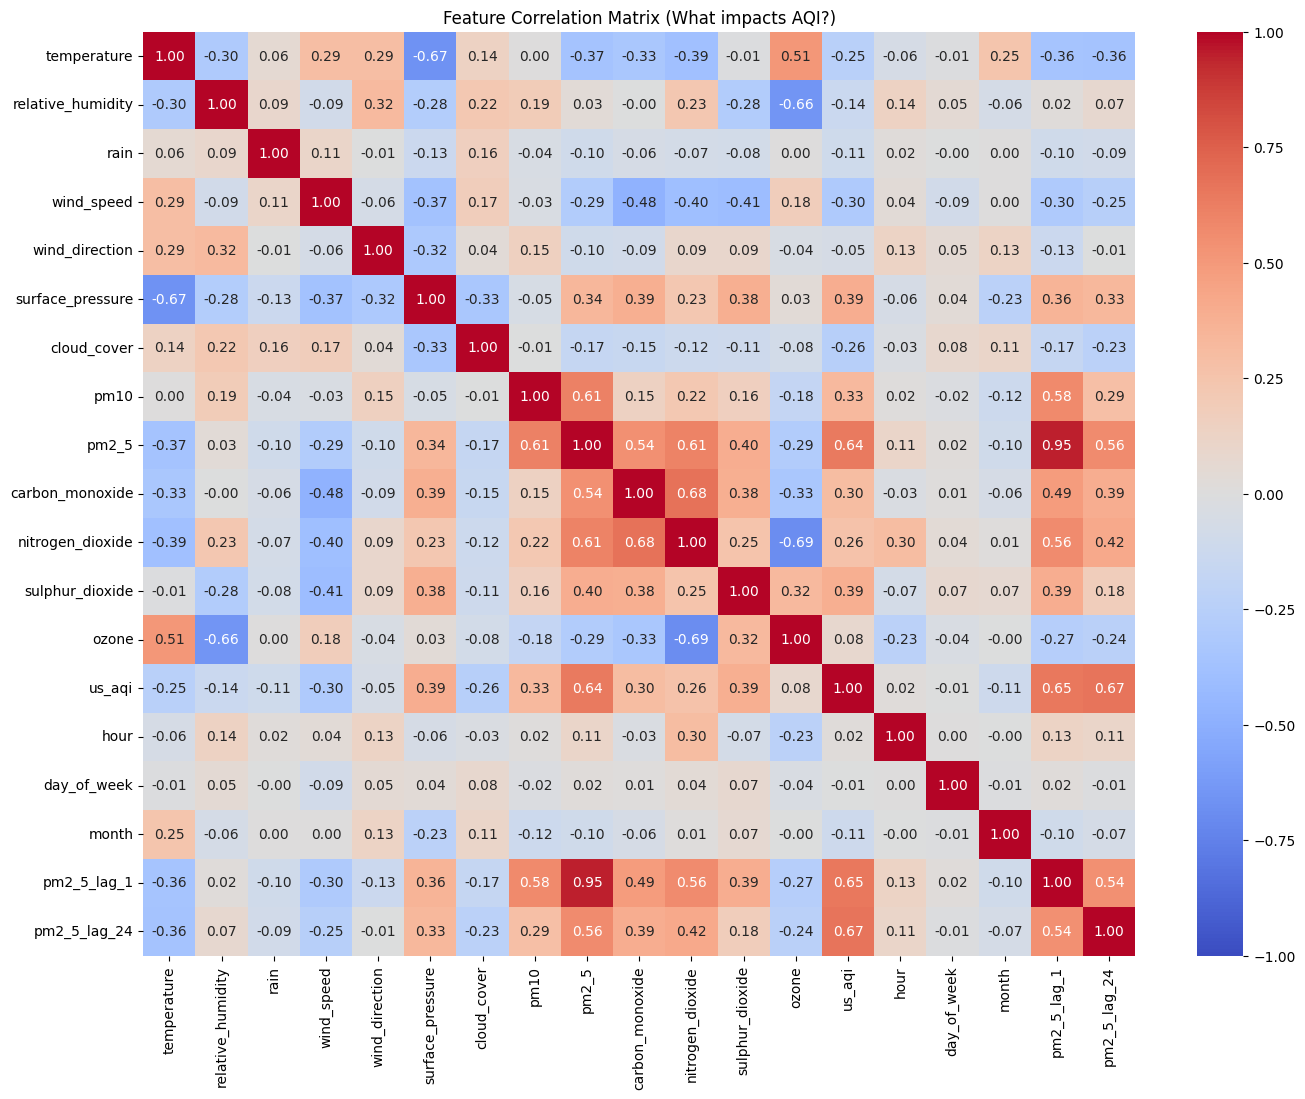

In [20]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix (What impacts AQI?)")
plt.show()

In [21]:
print("Correlation with AQI (Target):")
print(corr['us_aqi'].sort_values(ascending=False))

Correlation with AQI (Target):
us_aqi               1.000000
pm2_5_lag_24         0.665026
pm2_5_lag_1          0.653516
pm2_5                0.643179
surface_pressure     0.390896
sulphur_dioxide      0.389436
pm10                 0.326719
carbon_monoxide      0.299626
nitrogen_dioxide     0.261578
ozone                0.080416
hour                 0.019633
day_of_week         -0.006560
wind_direction      -0.054806
rain                -0.107422
month               -0.112403
relative_humidity   -0.135783
temperature         -0.248153
cloud_cover         -0.256824
wind_speed          -0.298253
Name: us_aqi, dtype: float64


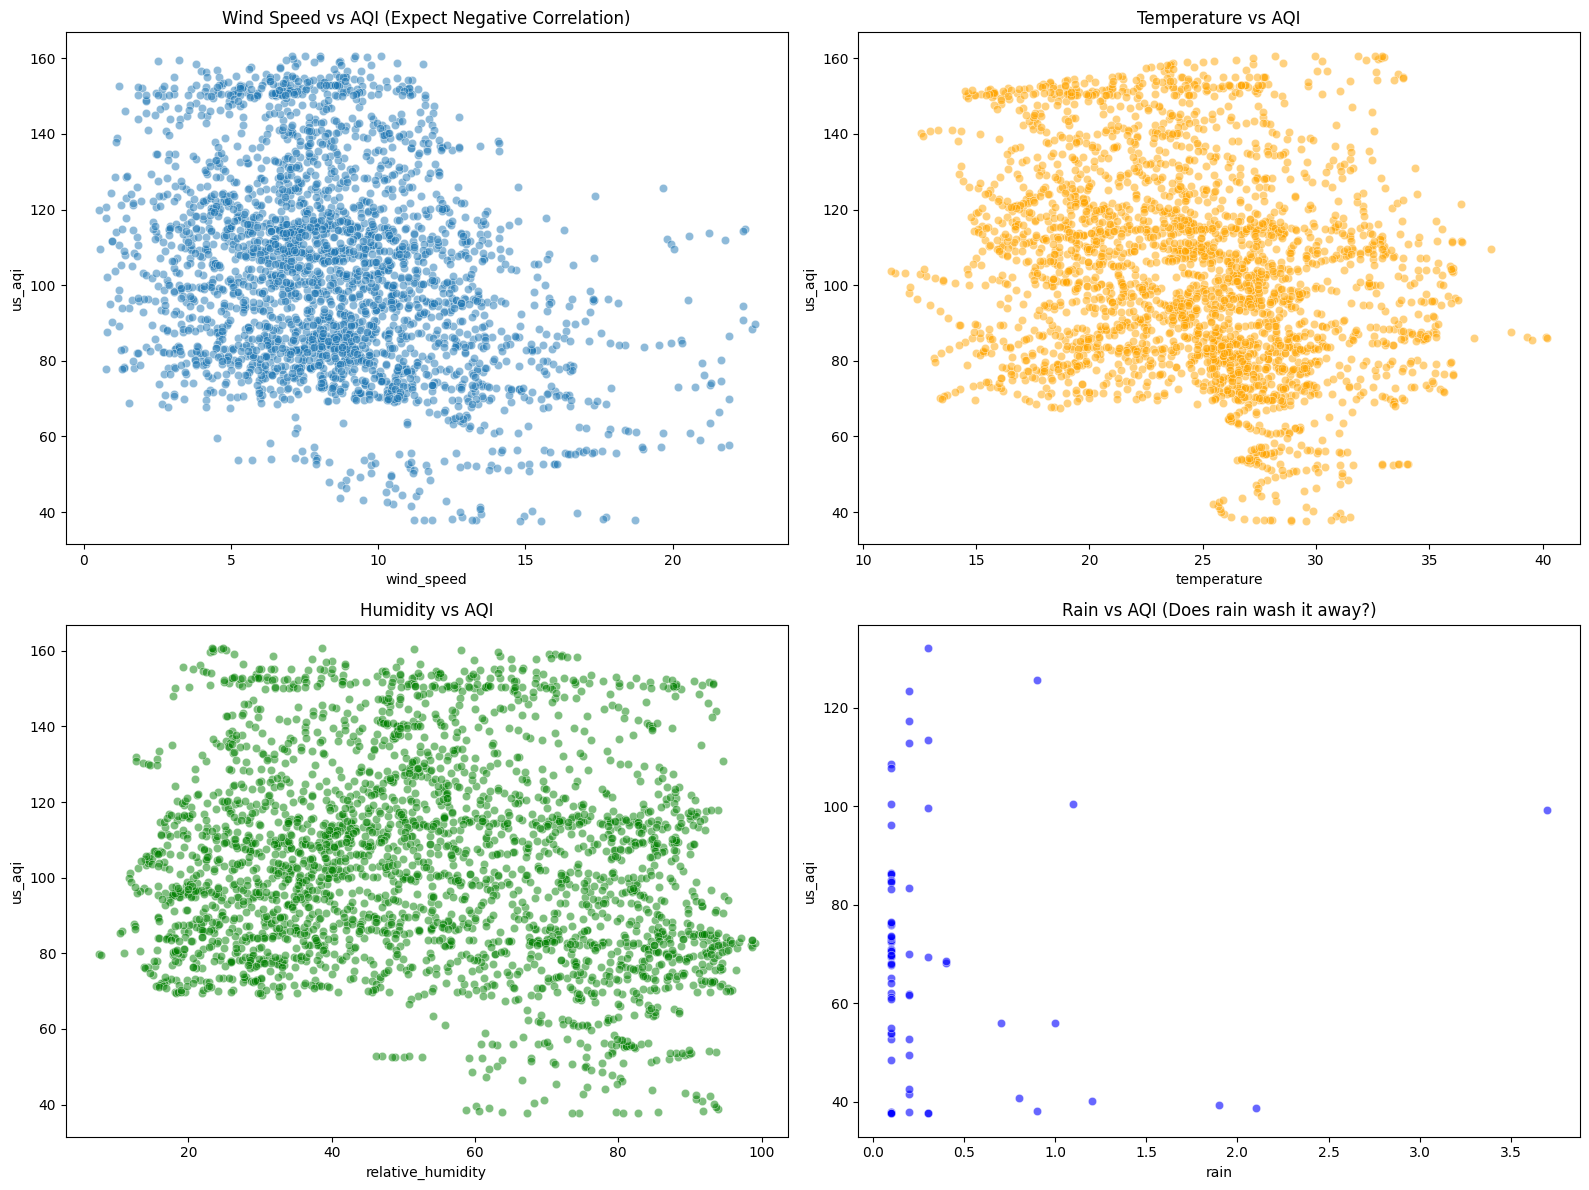

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df, x='wind_speed', y='us_aqi', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Wind Speed vs AQI (Expect Negative Correlation)")

# Temperature vs AQI
sns.scatterplot(data=df, x='temperature', y='us_aqi', alpha=0.5, color='orange', ax=axes[0, 1])
axes[0, 1].set_title("Temperature vs AQI")

# Humidity vs AQI
sns.scatterplot(data=df, x='relative_humidity', y='us_aqi', alpha=0.5, color='green', ax=axes[1, 0])
axes[1, 0].set_title("Humidity vs AQI")

# Rain vs AQI (Filter for days where it actually rained)
rainy_days = df[df['rain'] > 0]
sns.scatterplot(data=rainy_days, x='rain', y='us_aqi', alpha=0.6, color='blue', ax=axes[1, 1])
axes[1, 1].set_title("Rain vs AQI (Does rain wash it away?)")

plt.tight_layout()
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_6284\268040363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='us_aqi', data=df, palette="Reds")


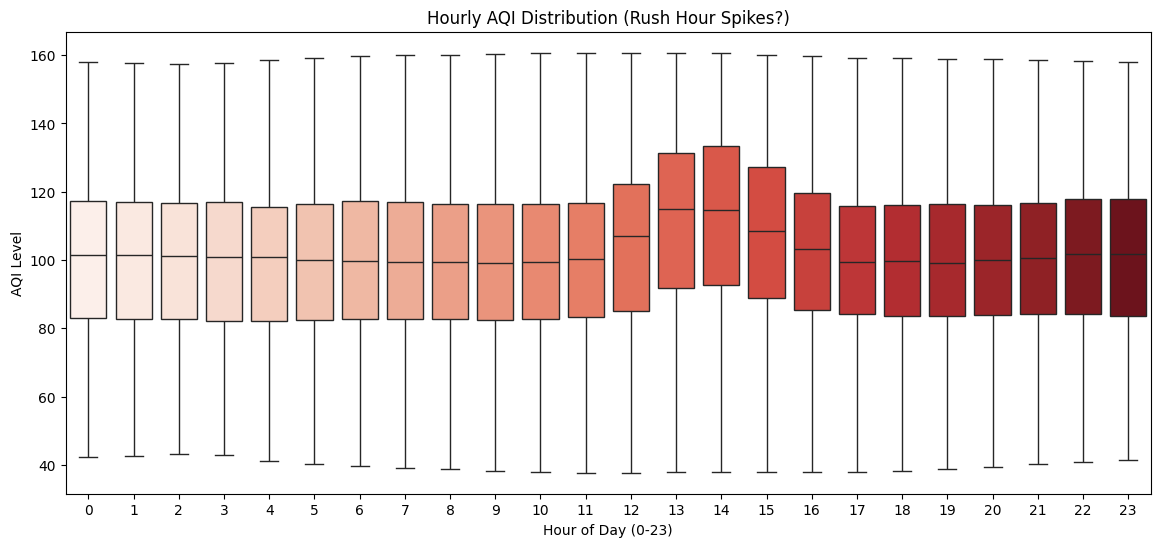

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='us_aqi', data=df, palette="Reds")
plt.title("Hourly AQI Distribution (Rush Hour Spikes?)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("AQI Level")
plt.show()